# A/B Testing of Marketing Campaign Strategies

This notebook employs data from two marketing campaign strategies. It aims to compare the efficacy of these strategies using the primary metric of 'number of purchases.' Additionally, it conducts an evaluation of secondary metrics like 'impressions' and 'website clicks' to gain a comprehensive understanding of campaign performance. Moreover, the notebook conducts a thorough analysis to assess the cost-effectiveness of each strategy based on the respective campaign expenditures.

In [316]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

#### Before doing any work with the data, I need to check if any issues need to be handled

In [222]:
test_group = pd.read_csv('test_group.csv', delimiter=';') # Test campaign
control_group = pd.read_csv('control_group.csv', delimiter=';') # Control campaign

In [223]:
test_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign Name        30 non-null     object
 1   Date                 30 non-null     object
 2   Spend [USD]          30 non-null     int64 
 3   # of Impressions     30 non-null     int64 
 4   Reach                30 non-null     int64 
 5   # of Website Clicks  30 non-null     int64 
 6   # of Searches        30 non-null     int64 
 7   # of View Content    30 non-null     int64 
 8   # of Add to Cart     30 non-null     int64 
 9   # of Purchase        30 non-null     int64 
dtypes: int64(8), object(2)
memory usage: 2.5+ KB


In [224]:
control_group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        30 non-null     object 
 1   Date                 30 non-null     object 
 2   Spend [USD]          30 non-null     int64  
 3   # of Impressions     29 non-null     float64
 4   Reach                29 non-null     float64
 5   # of Website Clicks  29 non-null     float64
 6   # of Searches        29 non-null     float64
 7   # of View Content    29 non-null     float64
 8   # of Add to Cart     29 non-null     float64
 9   # of Purchase        29 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 2.5+ KB


The test group seems ready for use, but most of the columns for the control grop have one null value. I think these could all be from one row, so I will check if that is the case. 

In [225]:
control_group[control_group.isna().any(axis=1)]

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This confirms that all null values are in the same row. This row has only date and spend, so I think it is reasonable to just drop the row. 

In [226]:
control_group.dropna(axis=0, inplace=True)

#### Get a summary of the data to understand better:

In [227]:
print('Control Group Summary:')
control_group.describe()

Control Group Summary:


,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,2304.068966,109559.758621,88844.931034,5320.793103,2221.310345,1943.793103,1300.000000,522.793103
std,363.534822,21688.922908,21832.349595,1757.369003,866.089368,777.545469,407.457973,185.028642
min,1757.000000,71274.000000,42859.000000,2277.000000,1001.000000,848.000000,442.000000,222.000000
25%,1962.000000,92029.000000,74192.000000,4085.000000,1615.000000,1249.000000,930.000000,372.000000
50%,2319.000000,113430.000000,91579.000000,5224.000000,2390.000000,1984.000000,1339.000000,501.000000
75%,2544.000000,121332.000000,102479.000000,6628.000000,2711.000000,2421.000000,1641.000000,670.000000
max,3083.000000,145248.000000,127852.000000,8137.000000,4891.000000,4219.000000,1913.000000,800.000000


In [228]:
print('Test Group Summary:')
test_group.describe()

Test Group Summary:


,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2563.066667,74584.800000,53491.566667,6032.333333,2418.966667,1858.000000,881.533333,521.233333
std,348.687681,32121.377422,28795.775752,1708.567263,388.742312,597.654669,347.584248,211.047745
min,1968.000000,22521.000000,10598.000000,3038.000000,1854.000000,858.000000,278.000000,238.000000
25%,2324.500000,47541.250000,31516.250000,4407.000000,2043.000000,1320.000000,582.500000,298.000000
50%,2584.000000,68853.500000,44219.500000,6242.500000,2395.500000,1881.000000,974.000000,500.000000
75%,2836.250000,99500.000000,78778.750000,7604.750000,2801.250000,2412.000000,1148.500000,701.000000
max,3112.000000,133771.000000,109834.000000,8264.000000,2978.000000,2801.000000,1391.000000,890.000000


## Data Visualization/Exploration

#### Primary metric visualizations (# of purchases): Histograms and Time-Series Line Charts
I am already seeing in the data summaries that the means are very close, but the distributions and trends might provide more information.

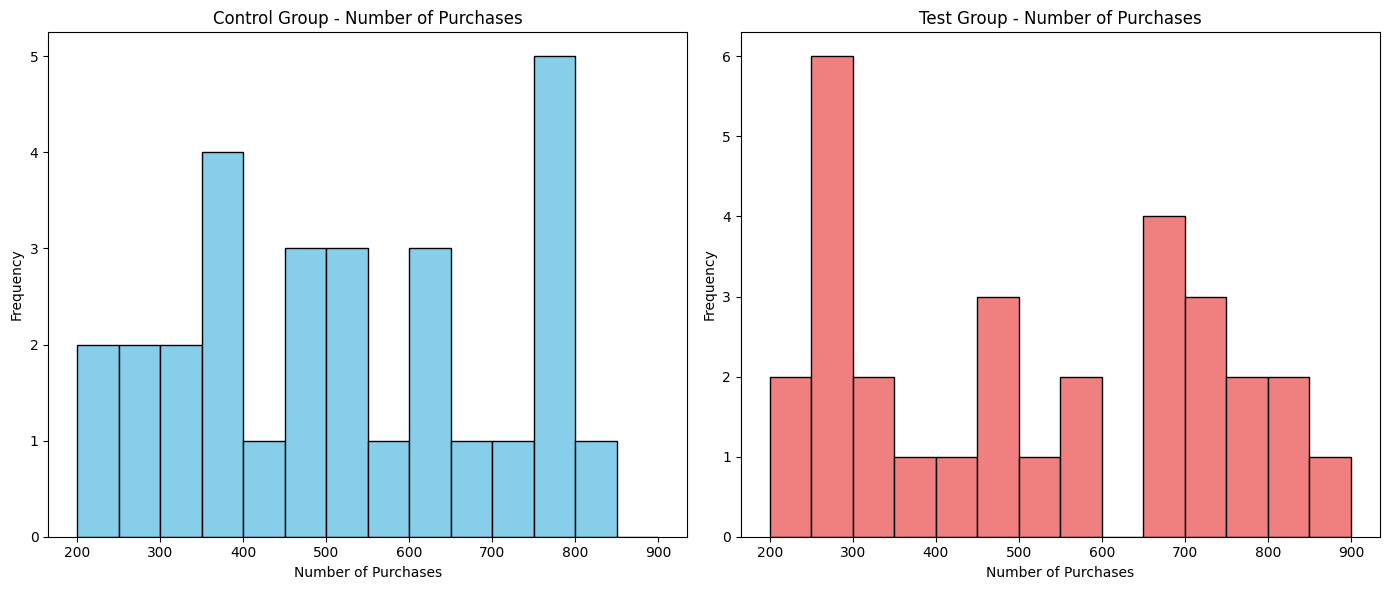

In [258]:
# Create a figure with two subplots (side by side, control vs. test)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Define bins
bin_edges = range(200, 901, 50)  # Start from 200, end at 900 (exclusive), with bin width 50

# Plot Control Group Number of Purchases
ax1.hist(control_group['# of Purchase'], bins=bin_edges, color='skyblue', edgecolor='black') 
ax1.set_xlabel('Number of Purchases')
ax1.set_ylabel('Frequency')
ax1.set_title('Control Group - Number of Purchases')
ax1.grid(False)

# Plot Test Group Number of Purchases
ax2.hist(test_group['# of Purchase'], bins=bin_edges, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Number of Purchases')
ax2.set_ylabel('Frequency')
ax2.set_title('Test Group - Number of Purchases')
ax2.grid(False) 

plt.tight_layout()
plt.show()

Key takeaways from histograms: 
- The means and medians of each look like they could be roughly similar
- The control group has it's peak frequency at a high number of purchases, while the test group peaks on the low end.
- Outside of the peaks, it is difficult to make clear takeaways. 

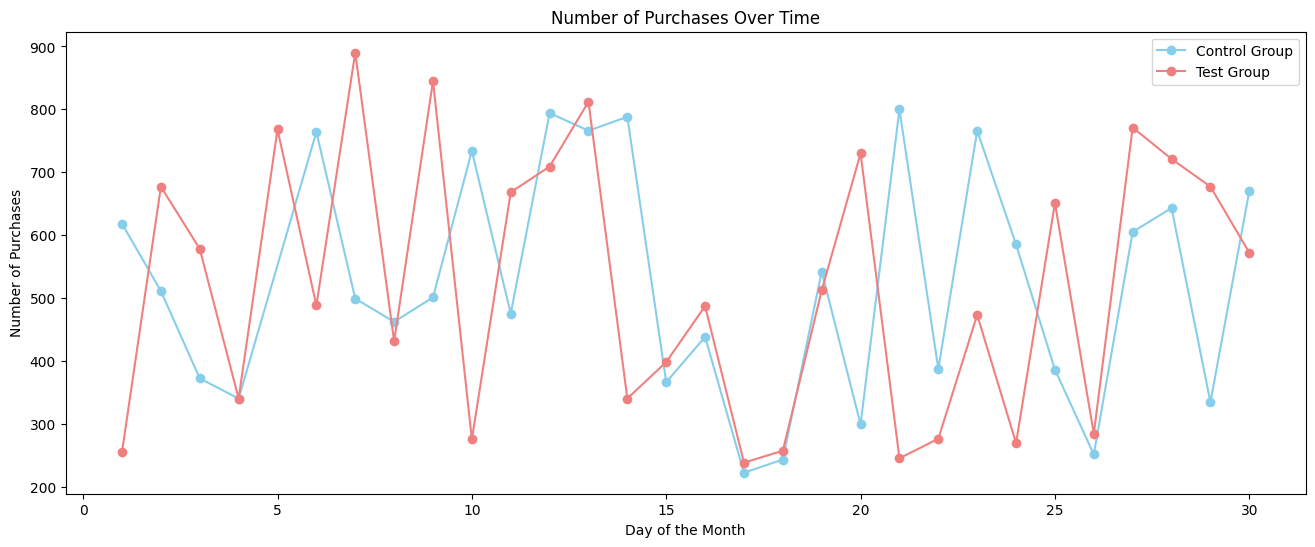

In [259]:
# Format date
date_format = "%d.%m.%Y"
control_group['Date'] = pd.to_datetime(control_group['Date'], format=date_format)
test_group['Date'] = pd.to_datetime(test_group['Date'], format=date_format)
# Extract day from the date
control_group['Day'] = control_group['Date'].dt.day
test_group['Day'] = test_group['Date'].dt.day

# Create a wider figure with subplots
fig, ax = plt.subplots(figsize=(16, 6))

# Plot Control Group Number of Purchases
ax.plot(control_group['Day'], control_group['# of Purchase'], color='skyblue', label='Control Group', marker='o', linestyle='-')

# Plot Test Group Number of Purchases
ax.plot(test_group['Day'], test_group['# of Purchase'], color='lightcoral', label='Test Group', marker='o', linestyle='-')

# Customize the plot
ax.set_xlabel('Day of the Month')
ax.set_ylabel('Number of Purchases')
ax.set_title('Number of Purchases Over Time')
ax.legend()

plt.show()

Key takeways from time series chart: 
- Both the control and test data seem unpredictable throughout the month. The number of purchases for each campaign strategy went up and down frequently.
- Both often reached low points and high points around the similar times. This could indicate that factors outside of the campaign strategies have a bigger impact on number of purchases. For example, the peaks could possibly be weekends where lots of people are shopping, and the lowest points could be holidays where people spend time with their families.
- The control group started higher and ended higher, but the test group reached a higher single day peak. The time series charts do not give any clear indications of a difference between the campaigns

By looking at their means/medians, the histograms, and the time-series plot of the two marketing strategies, I have not found enough early indications that the two strategies produce a significantly different number of total purchases. 

I will examine new metrics to see if the campaigns had significant impacts elsewhere. I think 'website clicks' is a valuable metric because it measures not only how many people saw the ad, but how many people were enticed by the ad to click on the website. 'Searches' may also be relevant because it represents interest in the product. 

However, total number of clicks might be misleading if they just paid for more ads and more ads are out there for people to click on. To account for this, I will make a 'click/impression' column to measure how many website clicks come from each view of the ad. I will also create a 'cost/click' column to measure how much is spent to earn each click. I will do the same manipulation for searches as well. 

In [236]:
control_group['click/impression'] = control_group['# of Website Clicks'] / control_group['# of Impressions']
control_group['cost/click'] = control_group['Spend [USD]'] / control_group['# of Website Clicks']
test_group['click/impression'] = test_group['# of Website Clicks'] / test_group['# of Impressions']
test_group['cost/click'] = test_group['Spend [USD]'] / test_group['# of Website Clicks']

#### Impression vs. Click scatterplot:

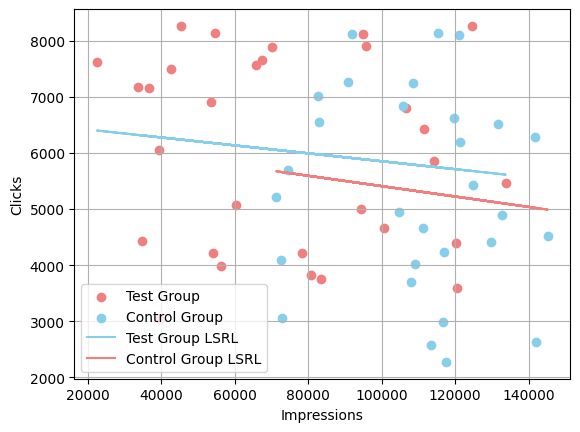

In [244]:
# Create scatter plot for the test group
plt.scatter(test_group['# of Impressions'], test_group['# of Website Clicks'], label='Test Group', color='lightcoral')
# Create scatter plot for the control group
plt.scatter(control_group['# of Impressions'], control_group['# of Website Clicks'], label='Control Group', color='skyblue')

# Calculate LSRL for the test group
test_group_coeffs = np.polyfit(test_group['# of Impressions'], test_group['# of Website Clicks'], 1)
test_group_line = np.poly1d(test_group_coeffs)
test_group_x = np.array(test_group['# of Impressions'])
test_group_y = test_group_line(test_group_x)
# Calculate LSRL for the control group
control_group_coeffs = np.polyfit(control_group['# of Impressions'], control_group['# of Website Clicks'], 1)
control_group_line = np.poly1d(control_group_coeffs)
control_group_x = np.array(control_group['# of Impressions'])
control_group_y = control_group_line(control_group_x)
# Plot LSRLs
plt.plot(test_group_x, test_group_y, color='skyblue', linestyle='-', label='Test Group LSRL')
plt.plot(control_group_x, control_group_y, color='lightcoral', linestyle='-', label='Control Group LSRL')

# Add labels and legend
plt.xlabel('Impressions')
plt.ylabel('Clicks')
plt.legend()

plt.grid(True)
plt.show()

In [238]:
# Calculate Pearson correlation coefficient for the test group
test_group_corr = np.corrcoef(test_group['# of Impressions'], test_group['# of Website Clicks'])[0, 1]
# Calculate Pearson correlation coefficient for the control group
control_group_corr = np.corrcoef(control_group['# of Impressions'], control_group['# of Website Clicks'])[0, 1]
print(f"Correlation coefficient for Test Group: {test_group_corr:.2f}")
print(f"Correlation coefficient for Control Group: {control_group_corr:.2f}")

Correlation coefficient for Test Group: -0.13
Correlation coefficient for Control Group: -0.11


Key takeaways from impressions vs. clicks:
- This is interesting because, within each group, I would expect more impressions to result in more clicks, but there appears to be no relationship between the two at all
- The test group seems to have a higher average number of clicks
- The control group seems to have a much higher average number of impressions

Now, I will do the same thing with cost and clicks

#### Cost vs. Click scatterplot:

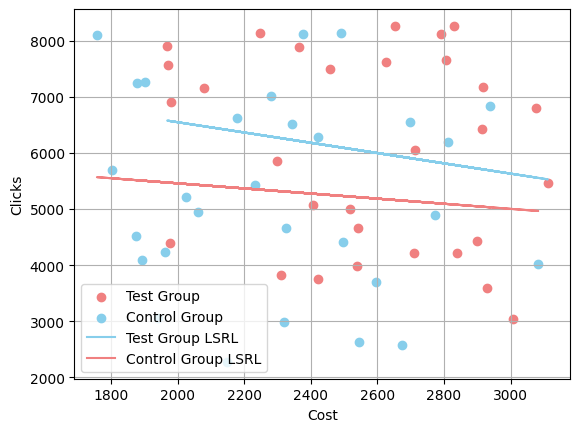

In [245]:
# Create scatter plot for the test group
plt.scatter(test_group['Spend [USD]'], test_group['# of Website Clicks'], label='Test Group', color='lightcoral')
# Create scatter plot for the control group
plt.scatter(control_group['Spend [USD]'], control_group['# of Website Clicks'], label='Control Group', color='skyblue')

# Calculate LSRL for the test group
test_group_coeffs = np.polyfit(test_group['Spend [USD]'], test_group['# of Website Clicks'], 1)
test_group_line = np.poly1d(test_group_coeffs)
test_group_x = np.array(test_group['Spend [USD]'])
test_group_y = test_group_line(test_group_x)
# Calculate LSRL for the control group
control_group_coeffs = np.polyfit(control_group['Spend [USD]'], control_group['# of Website Clicks'], 1)
control_group_line = np.poly1d(control_group_coeffs)
control_group_x = np.array(control_group['Spend [USD]'])
control_group_y = control_group_line(control_group_x)
# Plot LSRLs
plt.plot(test_group_x, test_group_y, color='skyblue', linestyle='-', label='Test Group LSRL')
plt.plot(control_group_x, control_group_y, color='lightcoral', linestyle='-', label='Control Group LSRL')

# Add labels and legend
plt.xlabel('Cost')
plt.ylabel('Clicks')
plt.legend()

plt.grid(True)
plt.show()

In [240]:
# Calculate Pearson correlation coefficient for the test group
test_group_corr = np.corrcoef(test_group['Spend [USD]'], test_group['# of Website Clicks'])[0, 1]
# Calculate Pearson correlation coefficient for the control group
control_group_corr = np.corrcoef(control_group['Spend [USD]'], control_group['# of Website Clicks'])[0, 1]
print(f"Correlation coefficient for Test Group: {test_group_corr:.2f}")
print(f"Correlation coefficient for Control Group: {control_group_corr:.2f}")

Correlation coefficient for Test Group: -0.19
Correlation coefficient for Control Group: -0.09


Key takeaways from cost vs. clicks:
- I am seeing pretty much the same results in cost vs. clicks as impresssions vs. clicks. There appears to be no correlation between money spent and clicks recieved
- The test group seems to have more clicks on average (already known)
- Both groups seem to have similar average costs

These results indicate that spending more money, leads to no increase in clicks. This could mean that the money is simply not worth it and spending more money on ads may be unnecessary. 

#### Correlation Matrix
I have explored a few secondary metrics that I think are important now, but there are still others like 'reach' and 'searches'. However, I expect all of the secondary metrics should be somewhat correlated with each other.

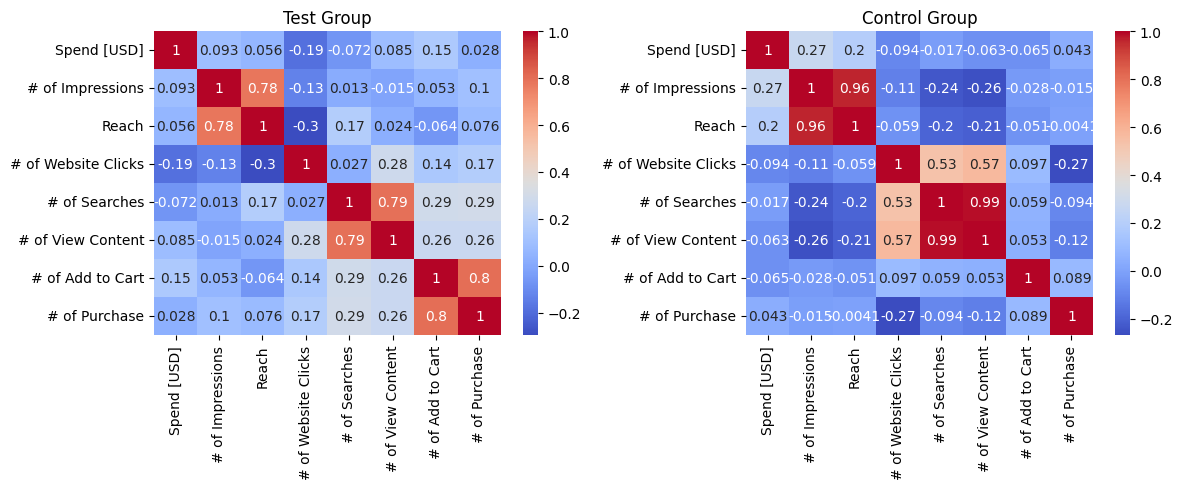

In [276]:
# Calculate correlation matrices for both groups
correlation_matrix_test = test_group[['Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase']].corr()
correlation_matrix_control = control_group[['Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase']].corr()

# Create a 1x2 grid for side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the heatmap for the test group
sns.heatmap(correlation_matrix_test, annot=True, cmap="coolwarm", ax=axes[0])
axes[0].set_title("Test Group")
# Plot the heatmap for the control group
sns.heatmap(correlation_matrix_control, annot=True, cmap="coolwarm", ax=axes[1])
axes[1].set_title("Control Group")

plt.tight_layout()
plt.show()

Key takeaways from correlation matrix:
- Some of the metrics have a strong correlation in both groups, like impressions/reach and searches/views.
- There are also some moderate correlations with clicks/reach and clicks/views
- Most of the correlations are fairly similar between both groups in terms of strength, except for add to cart and purchases. The test group has a very strong correlation between the two metrics, while the control group has a very weak correlation.
Since a lot of these metrics have some level of correlation with clicks and impressions, I will continue testing with only these variables.

#### Overall takeaways from data visualization and exploration:
The metrics that seem worth testing further are impressions and website clicks. From an initial look at the data (means and scatterplots), it appears that the test group has much higher impression numbers than the control group, and a noticable difference in website clicks. While the cost numbers appear fairly similar, further investigation is warranted, as variations in cost would impact the assessment of efficacy.

#### Next Steps:
I will now perform multiple hypothesis tests to find if there is a significant difference in cost, impressions, and website clicks between the two marketing strategies. I decided these to be the most relevant secondary metrics in comparing the strategies, and considering the risk of Type I error, I will only perform hypothesis tests on these variables. However, I suspect the other secondary metrics like 'reach', 'searches', and 'adds to cart' to have similar results because they are moderately correlated. Since I am doing 3 hypothesis tests, I will apply Bonferonni's adjustment appropriately, using a 0.017 alpha level. 

While number of purchases was my pre-determined primary metric, I do not view any need to test it further, as each group has a standard deviation of around 200 purchases, but their means are only separated by 1 purchase. This gives no indication that there would be a significant difference between the control and test group. Further, I noticed no obvious trends in the time-series chart, so those do not need to be evaluated further either. 

## Two-Sample t-test on Cost
I will be testing for a significant difference in mean cost first. If I can rule this variable out as a difference between the two groups, I can evaluate the marketing strategies based on pure performance, without having to account for a price difference. Otherwise, I will have to consider spending when assessing the efficacy of each campaign. 

#### Hypotheses:
- Null Hypothesis (Ho): There is no significant difference in mean cost between the control group and the test group.
- Alternative Hypothesis (Ha): There is a significant difference in mean cost between the control group and the test group. 

#### Checking conditions:

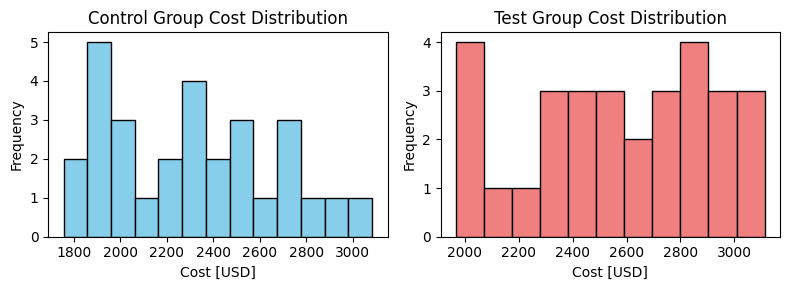

In [309]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.hist(control_group['Spend [USD]'], bins=13, color='skyblue', edgecolor='black')
ax1.set_xlabel('Cost [USD]')
ax1.set_ylabel('Frequency')
ax1.set_title('Control Group Cost Distribution')
ax2.hist(test_group['Spend [USD]'], bins=11, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Cost [USD]')
ax2.set_ylabel('Frequency')
ax2.set_title('Test Group Cost Distribution')

plt.tight_layout()
plt.show()

- Normality: Sample sizes are 30, so central limit theorem applies, but barely, so must check the histogram to be safe - there is no obvious skew or outliers that would be concerning.
- Independence: I do not have information on design, so I will have to assume each cost of each day is independent of each other.
- Equal Variance: The standard deviation of cost is similar enough between groups to assume equal variance.

All of the conditions for a two-sample t-test pass, so I will proceed accordingly.

In [314]:
tval, pval = stats.ttest_ind(a=test_group['Spend [USD]'], b=control_group['Spend [USD]'], equal_var=True)
print(f't-statistic: {tval.round(3)}\np-value: {pval.round(3)}')

t-statistic: 2.793
p-value: 0.007


#### Cost Conclusion:
The p-value of 0.007 is below the family-wise alpha level of 0.017, so I reject the null hypothesis. There is evidence that the two marketing strategies have a significantly different mean spending. Looking back at the data summaries, I have determined the control group spent more on average on their campaign than the test group. This means I will have to take cost into account when evaluating performance between the strategies. 

## Hypothesis Test on Impressions
I will be testing for a significant difference in mean number of impressions between the two marketing strategies. This will help idenitfy a possible difference in how much the content was displayed to the target audience. 

#### Hypotheses:
- Null Hypothesis (Ho): There is no significant difference in mean number of impressions between the control group and the test group.
- Alternative Hypothesis (Ha): There is a significant difference in mean number of impressions between the control group and the test group. 

#### Checking conditions:

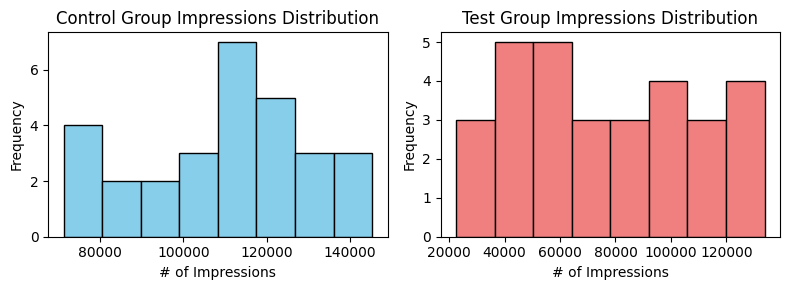

In [313]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.hist(control_group['# of Impressions'], bins=8, color='skyblue', edgecolor='black')
ax1.set_xlabel('# of Impressions')
ax1.set_ylabel('Frequency')
ax1.set_title('Control Group Impressions Distribution')
ax2.hist(test_group['# of Impressions'], bins=8, color='lightcoral', edgecolor='black')
ax2.set_xlabel('# of Impressions')
ax2.set_ylabel('Frequency')
ax2.set_title('Test Group Impressions Distribution')

plt.tight_layout()
plt.show()

- Normality: Sample sizes are 30, so central limit theorem applies, but barely, so must check the histogram to be safe - there is no obvious skew or outliers that would be concerning.
- Independence: I do not have information on design, so I will have to assume impressions of each day are independent of each other.
- Equal Variance: The standard deviation of impressions is similar enough between groups to assume equal variance.

All of the conditions for a two-sample t-test pass, so I will proceed accordingly.

In [315]:
tval, pval = stats.ttest_ind(a=test_group['# of Impressions'], b=control_group['# of Impressions'], equal_var=True)
print(f't-statistic: {tval.round(3)}\np-value: {pval.round(3)}')

t-statistic: -4.885
p-value: 0.0


#### Impressions Conclusion:
The p-value is well below the family-wise alpha level of 0.017, so I reject the null hypothesis. There is evidence that the two marketing strategies have a significantly different mean number of impressions. Looking back at the data summaries, this means the test group had a significantly higher number of impressions than the control group. 

## Hypothesis Test on Website Clicks
I will be testing for a significant difference in mean number of website clicks between the two marketing strategies. This will help determine if the campaigns have a different level of effectiveness in enticing viewers to visit the website. 

#### Hypotheses:
- Null Hypothesis (Ho): There is no significant difference in median (edited after checking conditions) number of impressions between the control group and the test group.
- Alternative Hypothesis (Ha): There is a significant difference in median number of impressions between the control group and the test group. 

#### Checking conditions:

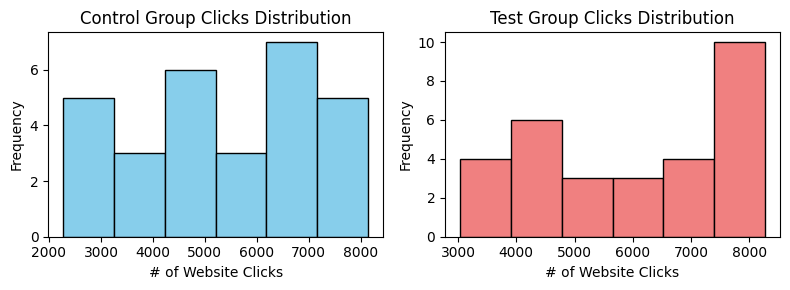

In [321]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.hist(control_group['# of Website Clicks'], bins=6, color='skyblue', edgecolor='black')
ax1.set_xlabel('# of Website Clicks')
ax1.set_ylabel('Frequency')
ax1.set_title('Control Group Clicks Distribution')
ax2.hist(test_group['# of Website Clicks'], bins=6, color='lightcoral', edgecolor='black')
ax2.set_xlabel('# of Website Clicks')
ax2.set_ylabel('Frequency')
ax2.set_title('Test Group Clicks Distribution')

plt.tight_layout()
plt.show()

- Normality: Central limit theorem applies with sample size of 30, but the test group definitely has a left skew.
- Independence: I do not have information on design, so I will have to assume website clicks of each day are independent of each other.
- Equal Variance: The standard deviation of website clicks is similar enough between groups to assume equal variance.

I am not comfortable proceeding at this point with a two-sample t-test because of the questionable normality. To attempt to resolve this, I will perform a logarithmic transformation on the data.

In [326]:
control_group['Log_Clicks'] = np.log(control_group['# of Website Clicks'])
test_group['Log_Clicks'] = np.log(test_group['# of Website Clicks'])

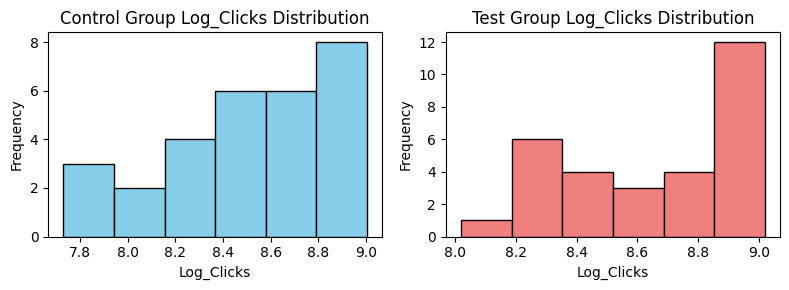

In [327]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 3))
ax1.hist(control_group['Log_Clicks'], bins=6, color='skyblue', edgecolor='black')
ax1.set_xlabel('Log_Clicks')
ax1.set_ylabel('Frequency')
ax1.set_title('Control Group Log_Clicks Distribution')
ax2.hist(test_group['Log_Clicks'], bins=6, color='lightcoral', edgecolor='black')
ax2.set_xlabel('Log_Clicks')
ax2.set_ylabel('Frequency')
ax2.set_title('Test Group Log_Clicks Distribution')

plt.tight_layout()
plt.show()

The logarithmic transformation did not help - there is now a clear left skew in BOTH distributions. The sample size might just be too small to resolve the issue, so I will use a resampling technique called bootstrapping. This technique estimates the sample distribution by repeatedly resampling the data with replacement. It then gives a confidence interval for the resampled means/medians. Since my family-wise a is 0.017, I will set the confidence level to 98.3%. If the control and test intervals do not overlap, this means they are significantly different.

In [369]:
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as bs_stats

# Perform bootstrapping for medians because the data is so skewed. Default resampling is 9999
control_ci = bs.bootstrap(control_group['# of Website Clicks'].values, stat_func=bs_stats.median, alpha=0.017)
test_ci = bs.bootstrap(test_group['# of Website Clicks'].values, stat_func=bs_stats.median, alpha=0.017)
print(f'Control Group CI (median): {control_ci}')
print(f'Test Group CI (median): {test_ci}')

Control Group CI (median): 5224.0    (3894.0, 6214.0)
Test Group CI (median): 6242.5    (4957.0, 7941.0)


To check the bootstrapping results, I will see if the conclusion roughly compares to the two-sample t-test, which was not used as the primary test because the conditions did not apply. If both of these techniques come to the same conclusion, I will be confident with the results. 

In [364]:
tval, pval = stats.ttest_ind(a=test_group['# of Website Clicks'], b=control_group['# of Website Clicks'], equal_var=True)
print(f't-statistic: {tval.round(3)}\np-value: {pval.round(3)}')

t-statistic: 1.577
p-value: 0.12


#### Website Clicks Conclusion: 

Since the 98.3% confidence intervals do not overlap, there is not evidence that the control group and test group have a significantly different median number of website clicks. This is further supported by the two-sample t-test that produced a p-value above the alpha level of 0.017. Moving forward, the practical assumption is that the two marketing strategies do not have a difference in website clicks.

## Simplified Findings
1. The control group spends more money on average than the test group on their marketing campaign.
2. The test group generates more impressions for their product on average than the control group.
3. There is no evidence of a difference in website clicks for the test or control group. 

## Recommendation
In terms of number of purchases, there was no difference between the control and test campaign, so purely based on the primary metric, they were equally effective. However, the test group was significantly cheaper, making it the clear choice moving forward. In addition, the test group can be considered a success in the fact that it generated more impressions with less spending. There certainly needs to be further testing and evaluation, though, because the uptick in impressions did not lead to an increase in purchases, or even an increase in website clicks. This could possibly be improved with more changes to the marketing campaign. Alternatively, it could pertain to aspects of the website display that deter clicks or various elements of the product, such as pricing or presentation, that are failing to stimulate an increase in purchases. 